<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/11_YOLO/Custom_YoloV3_Training/YoloV3_CustomData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-f12bac2a-a976-f469-a3bc-976b071fc451)


In [ ]:
# !git clone https://github.com/theschoolofai/YoloV3.git /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3

Cloning into '/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 12.95 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (127/127), done.


In [ ]:
# !unzip /content/drive/MyDrive/customdata.zip -d /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg075.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg076.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg077.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg078.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg079.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg080.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg081.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg082.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/images/Jimg083.jpg  
  inflating: /content/drive/MyDrive/YoloV3_Custom_Data/Yol

In [19]:
!ls  /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/

custom.data  custom.names   custom.txt	labels	     test.txt	   train.txt
custom.gdoc  custom.shapes  images	test.shapes  train.shapes


In [20]:
!cat /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/train.txt | tail -2

./data/customdata/images/8.jpg
./data/customdata/images/9.jpg

In [21]:
!cat /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/customdata/custom.data

classes=4
train=data/customdata/train.txt
valid=data/customdata/test.txt
names=data/customdata/custom.names

In [22]:
import time
import glob
import torch
import os
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', major=7, minor=0, total_memory=16160MB, multi_processor_count=80)


In [23]:
%cd /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3

/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3


In [7]:
!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-07-21 23:18:41.643547: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:04<00:00,  4.47it/s]
Caching images (0.0GB): 100% 20/20 [00:06<00:00,  3.29it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 9

In [10]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-07-21 23:20:57.439887: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3126 found, 131 missing, 38 empty, 0 duplicate, for 3295 images): 100% 3295/3295 [12:43<00:00,  4.32it/s]
Caching images (1.8GB): 100% 3295/3295 [15:14<00:00,  3.60it/s]
Caching labels (305 found, 14 missing, 7 empty, 0 duplicate, for 326 images): 10

In [24]:
!python detect.py --conf-thres 0.1 --source "/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images" --output output

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/16 /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images/image-01.jpg: 512x512 1 hardhats, 1 vests, Done. (0.011s)
image 2/16 /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images/image-02.JPG: 512x448 4 hardhats, 1 vests, Done. (0.011s)
image 3/16 /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images/image-03.JPG: 448x512 2 hardhats, 2 vests, Done. (0.010s)
image 4/16 /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images/image-04.jpg: 384x512 2 hardhats, 2 vests, Done. (0.010s)
image 5/16 /content/dri

In [26]:
!python detect.py --conf-thres 0.1 --source "/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/Learning Construction.mp4" --output out_out

Streaming output truncated to the last 5000 lines.
video 1/1 (782/5779) /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/Learning Construction.mp4: 320x512 2 hardhats, 3 vests, Done. (0.008s)
video 1/1 (783/5779) /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/Learning Construction.mp4: 320x512 3 hardhats, 3 vests, Done. (0.008s)
video 1/1 (784/5779) /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/Learning Construction.mp4: 320x512 3 hardhats, 2 vests, Done. (0.009s)
video 1/1 (785/5779) /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/Learning Construction.mp4: 320x512 3 hardhats, 2 vests, Done. (0.008s)
video 1/1 (786/5779) /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/Learning Construction.mp4: 320x512 3 hardhats, 2 vests, Done. (0.008s)
video 1/1 (787/5779) /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/data/Learning Construction.mp4: 320x512 3 hardhats, 1 vests, Done. (0.009s)
video 1/1 (788/5779) /content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/dat

In [41]:
os.listdir('/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output')

['image-01.jpg',
 'image-02.JPG',
 'image-03.JPG',
 'image-04.jpg',
 'image-05.jpg',
 'image-06.jpg',
 'image-07.jpg',
 'image-08.jpg',
 'image-09.jpg',
 'image-10.jpg',
 'image-11.jpg',
 'image-12.jpg',
 'image-13.jpg',
 'image-14.jpg',
 'image-15.jpg',
 'image-16.jpg']

## Predictions for Hardhat

In [51]:
w=400

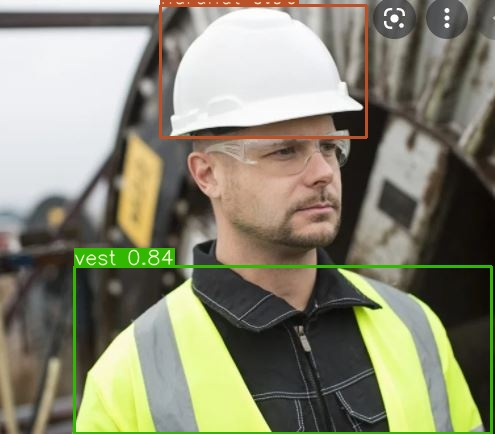

In [52]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-01.jpg', width=w)

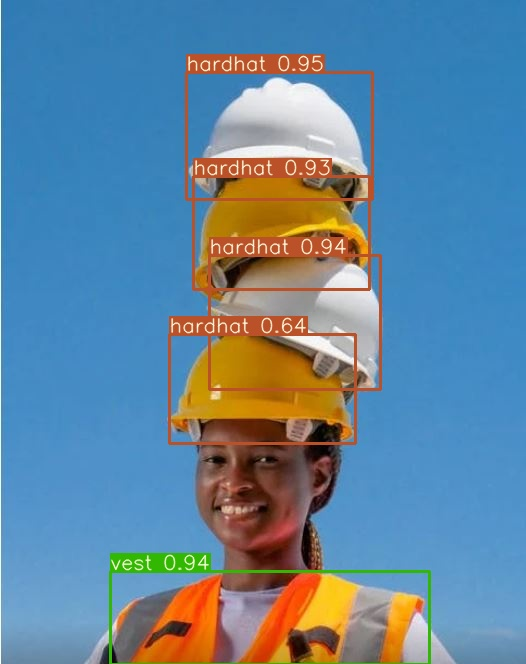

In [53]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-02.JPG', width=w)

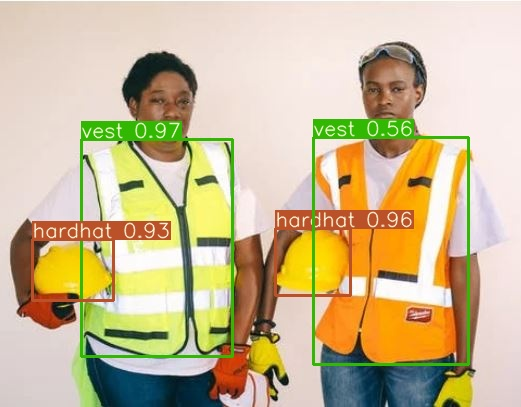

In [54]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-03.JPG', width=w)

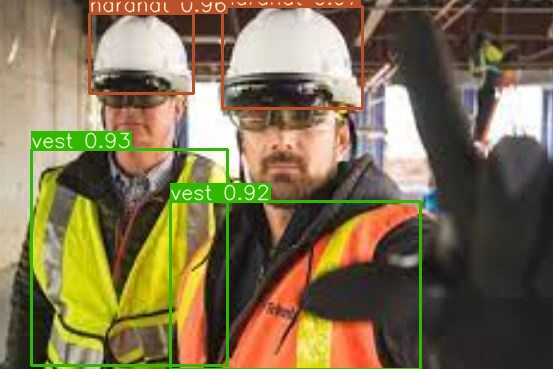

In [55]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-04.jpg', width=w)

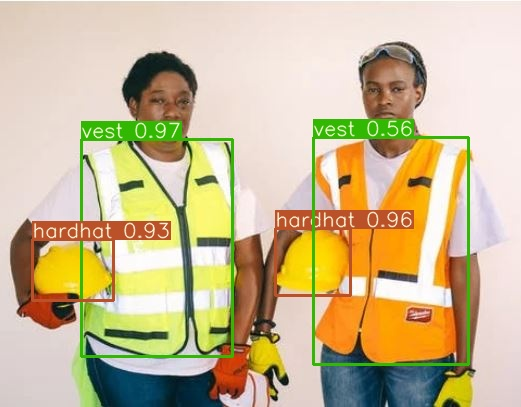

In [56]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-03.JPG', width=500)

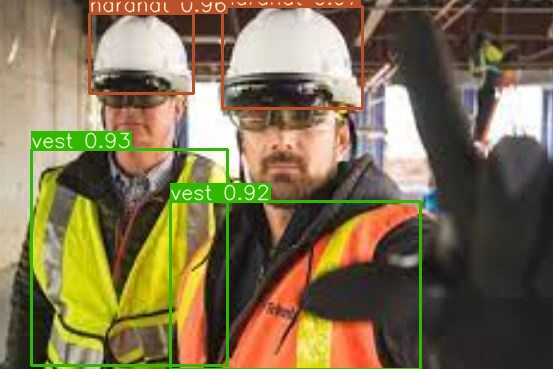

In [57]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-04.jpg', width=500)

## Predictions for Mask

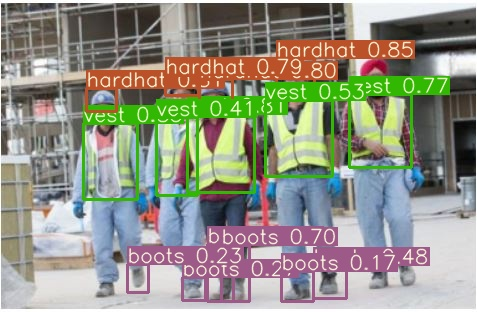

In [62]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-08.jpg', width=500)

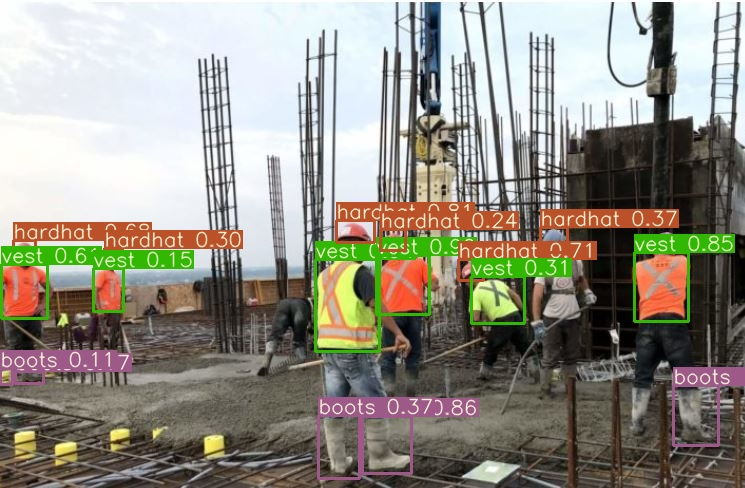

In [63]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-09.jpg', width=500)

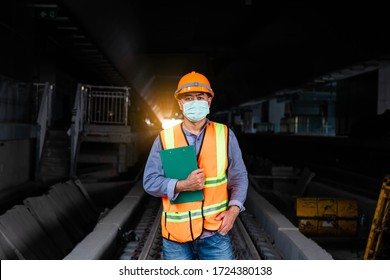

In [65]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/images/image-10.jpg', width=500)

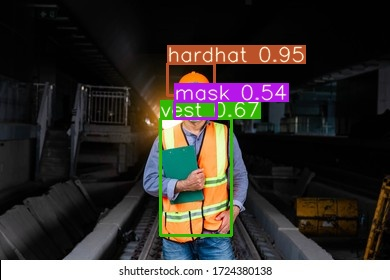

In [64]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-10.jpg', width=500)

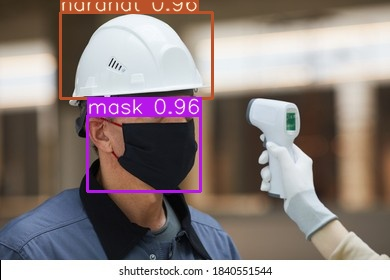

In [66]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-11.jpg', width=500)

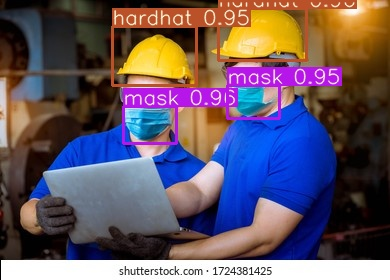

In [67]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-12.jpg', width=500)

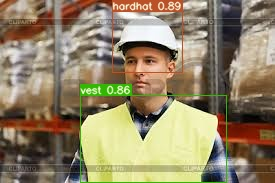

In [68]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-13.jpg', width=500)

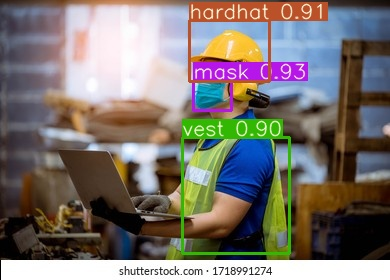

In [69]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-14.jpg', width=500)

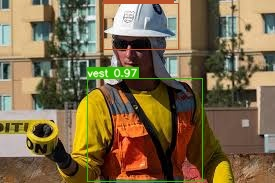

In [70]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-15.jpg', width=500)

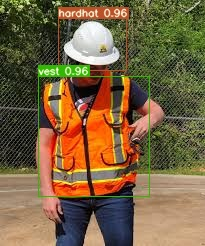

In [71]:
Image(filename='/content/drive/MyDrive/YoloV3_Custom_Data/YoloV3/output/image-16.jpg', width=500)